Sentiment Analysis uses natural language processing to attempt to detect sentiment in some text:
- Negative Sentiment
- Positive Sentiment

Can easily obtain po/neg sentiment scores (-1.0 to 1.0) from a variety of sources on Quantopian

Impact is a measure of how likely a stock price will change as a result of the sentiment

### Futures
A derivative is a contract between two or more parties whose value is based on an agreed-upon underlying financial asset, index, or security. Common underlying instruments: bonds, commodities, currencies, interest rates, market indexes, and stocks

#### Forward Contracts
Forward Contracts are an agreement between two parties to pay a delivery price K for some asset at some future time. 

The person selling the asset is said to be in the short position, the person to buy it in the future is in the long position.

It reduces risk on both sides, since both parties know how much the price will be in the future

Even though Forward Contracts are simple, there are some issues with them:
- Conterparty Risk
- Lack of Liquidity
- Need to negotiate many customized terms of the contract

### Futures Contracts
Futures contracts are forward contracts that have been standardized for trade on an exchange

A single futures contract is for a set amount of the underlying with agreed-upon settlement, delivery date, and terms

On top of this, the exchange acts as an intermediary, virtually eliminating counterparty risk

Futures for a given asset are standardized, so the terms of corn futures may differ from the terms of port bellies futures

The existence of Future Contracts leads to Futures Speculation and Futures Hedging

Futures are settled daily with a margin account at a broker held by the holder of the futures contract.
Each day, the change in price of the underlying is reflected in an increase or a decrease in the amount of money in the margin account. This process is called "marking to market"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Futures contracts are denoted by a base symbol + a code for month/year of delivery. CLF16 is a contract for crude oil (CL) with delivery in January (F) 2016 (16)

In [2]:
# Grab the future contract data for Natural Gas for a maturity date of January 2019
future_contract = symbols('NGF19')

In [3]:
future_contract.asset_name

'Natural Gas'

In [4]:
for key in future_contract.to_dict():
    print(key)
    print(future_contract.to_dict()[key])
    print('\n')

exchange
NYMEX


notice_date
2018-12-28 00:00:00+00:00


tick_size
0.001


first_traded
None


exchange_info
ExchangeInfo('NYMEX', 'NYMEX', 'US')


sid
1061201901


start_date
2010-12-23 00:00:00+00:00


asset_name
Natural Gas


root_symbol
NG


symbol
NGF19


multiplier
10000.0


end_date
2018-12-27 00:00:00+00:00


expiration_date
2018-12-27 00:00:00+00:00


auto_close_date
2018-12-24 00:00:00+00:00


exchange_full
NYMEX




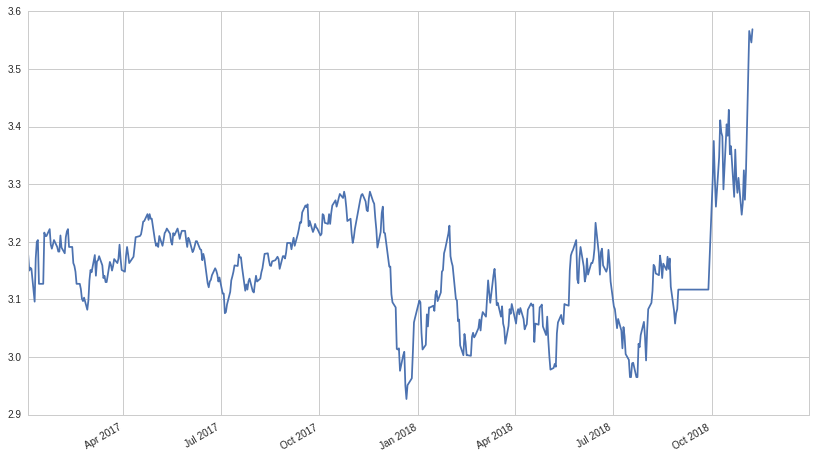

In [5]:
futures_position_value = get_pricing(future_contract,start_date='2017-01-01',end_date='2019-01-01', fields='price')

futures_position_value.name = futures_position_value.name.symbol
futures_position_value.plot()

In [6]:
from quantopian.research.experimental import history

In [7]:
ngf19 = future_contract

In [11]:
ngf19_data = history(ngf19,
                    fields=['price','open_price','high','low','close_price','volume','contract'],
                    frequency='daily',
                    start = '2018-06-01',
                    end='2018-08-01')

In [12]:
ngf19_data.head()

,price,open_price,high,low,close_price,volume,contract
2018-06-01 00:00:00+00:00,3.191,3.166,3.194,3.155,3.191,1654.0,Future(1061201901 [NGF19])
2018-06-04 00:00:00+00:00,3.157,3.171,3.191,3.155,3.157,1450.0,Future(1061201901 [NGF19])
2018-06-05 00:00:00+00:00,3.131,3.153,3.160,3.115,3.131,1119.0,Future(1061201901 [NGF19])
2018-06-06 00:00:00+00:00,3.140,3.137,3.151,3.118,3.140,1907.0,Future(1061201901 [NGF19])
2018-06-07 00:00:00+00:00,3.171,3.138,3.196,3.137,3.171,2109.0,Future(1061201901 [NGF19])


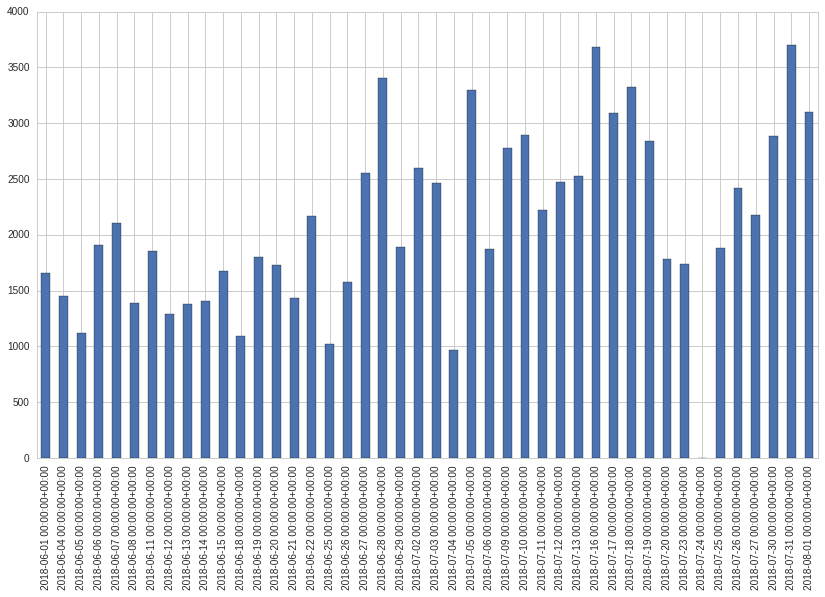

In [14]:
ngf19_data['volume'].plot(kind='bar')

In [15]:
ng_contracts = symbols(['NGF18','NGG18','NGH18','NGJ18','NGK18','NGM18'])

In [16]:
ng_consecutive_contract_volume = history(ng_contracts,
                                        fields='volume',
                                        frequency='daily',
                                        start='2017-01-01',
                                        end='2018-08-01')

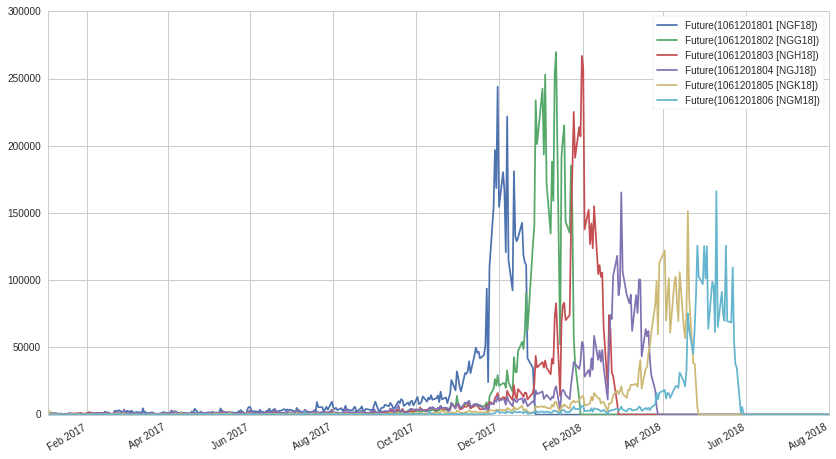

In [17]:
ng_consecutive_contract_volume.plot()

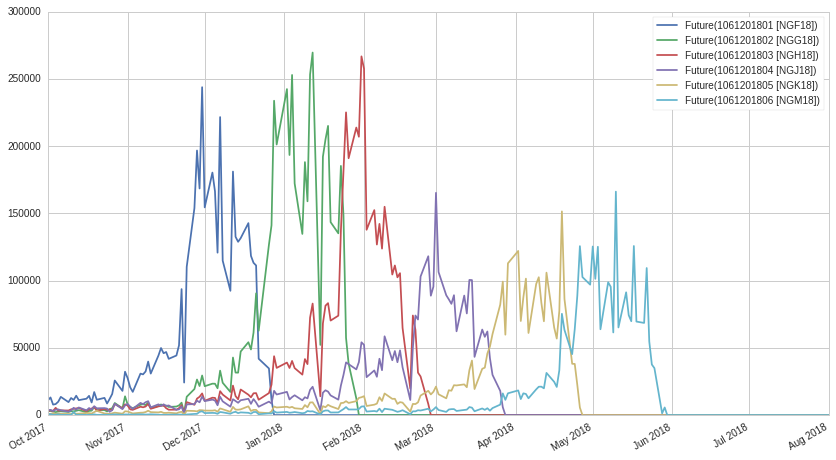

In [18]:
ng_consecutive_contract_volume.plot(xlim=['2017-10-01','2018-08-01'])

In [20]:
from quantopian.research.experimental import continuous_future

In [21]:
print(continuous_future.__doc__)


    Create a specifier for a continuous contract.

    Parameters
    ----------
    root_symbol : str
        The root symbol for the continuous future.

    offset : int, optional
        The distance from the primary contract. Default is 0.

    roll : str, optional
        How rolls are determined. Options are 'volume' and 'calendar'. Default
        is 'volume'.

    adjustment : str
        Method for adjusting lookback prices between rolls. Options are
        'mul', 'add', and None. Default is 'mul'.

    Returns
    -------
    continuous_future : ContinuousFuture
        The continuous future specifier.
    


In [23]:
continuous_ng = continuous_future('NG',offset=0,roll='volume',adjustment='mul')
continuous_ng

ContinuousFuture(94090707563773952, root_symbol='NG', offset=0, roll_style='volume', adjustment='mul')

In [25]:
ng_cont_active = history(continuous_ng,
                        fields=['contract','price','volume'],
                        frequency='daily',
                        start='2017-10-01',
                        end='2018-08-01')

In [26]:
ng_cont_active.head()

,price,volume,contract
2017-10-02 00:00:00+00:00,2.932,168873.0,Future(1061201711 [NGX17])
2017-10-03 00:00:00+00:00,2.908,97462.0,Future(1061201711 [NGX17])
2017-10-04 00:00:00+00:00,2.943,111734.0,Future(1061201711 [NGX17])
2017-10-05 00:00:00+00:00,2.904,125724.0,Future(1061201711 [NGX17])
2017-10-06 00:00:00+00:00,2.873,115433.0,Future(1061201711 [NGX17])


In [27]:
ng_cont_active['contract'].unique()

array([Future(1061201711 [NGX17]), Future(1061201712 [NGZ17]),
       Future(1061201801 [NGF18]), Future(1061201802 [NGG18]),
       Future(1061201803 [NGH18]), Future(1061201804 [NGJ18]),
       Future(1061201805 [NGK18]), Future(1061201806 [NGM18]),
       Future(1061201807 [NGN18]), Future(1061201808 [NGQ18]),
       Future(1061201809 [NGU18])], dtype=object)

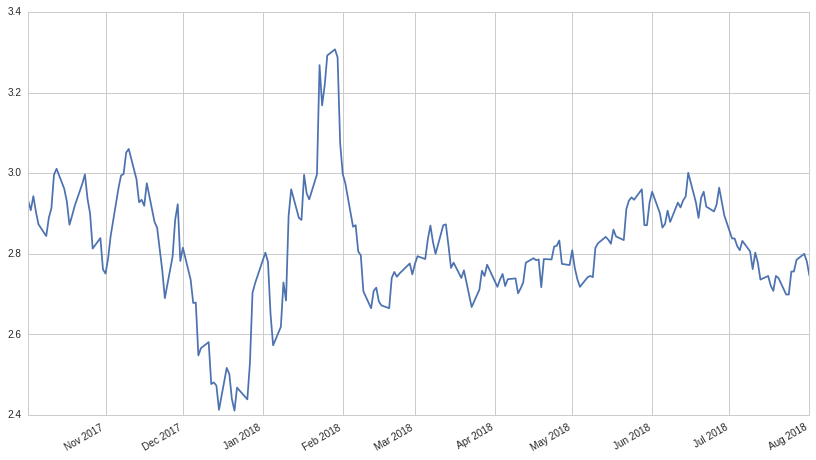

In [29]:
ng_cont_active['price'].plot()

In [30]:
ng_consecutive_contract_volume = history(ng_contracts,
                                        fields='volume',
                                        frequency='daily',
                                        start='2017-10-01',
                                        end='2018-08-01')

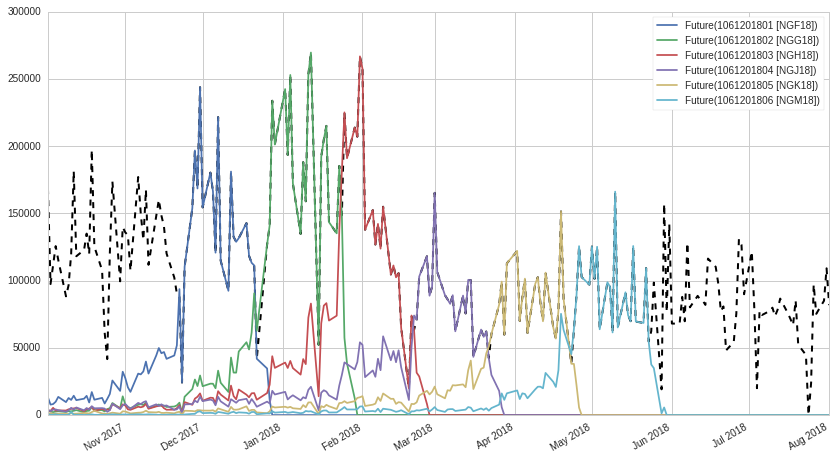

In [31]:
ax = ng_cont_active['volume'].plot(ls='--',c='black',lw=2)
ng_consecutive_contract_volume.plot(ax=ax)

In [32]:
ng_consecutive_contract_price = history(ng_contracts,
                                        fields='price',
                                        frequency='daily',
                                        start='2017-10-01',
                                        end='2018-08-01')

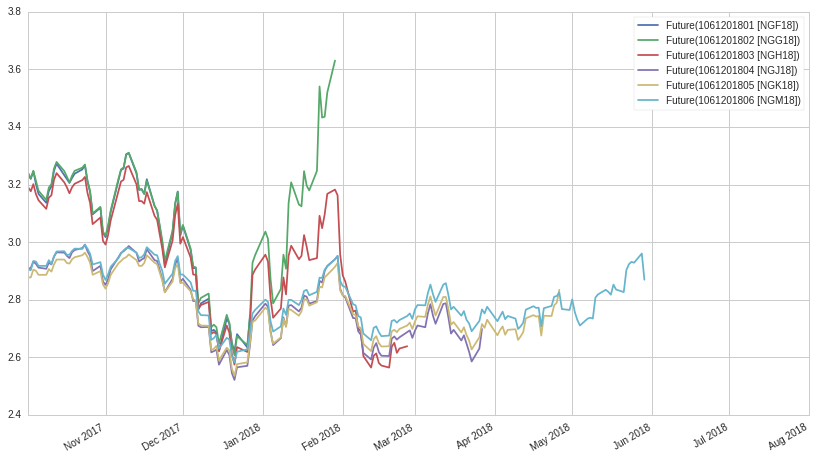

In [33]:
ng_consecutive_contract_price.plot()

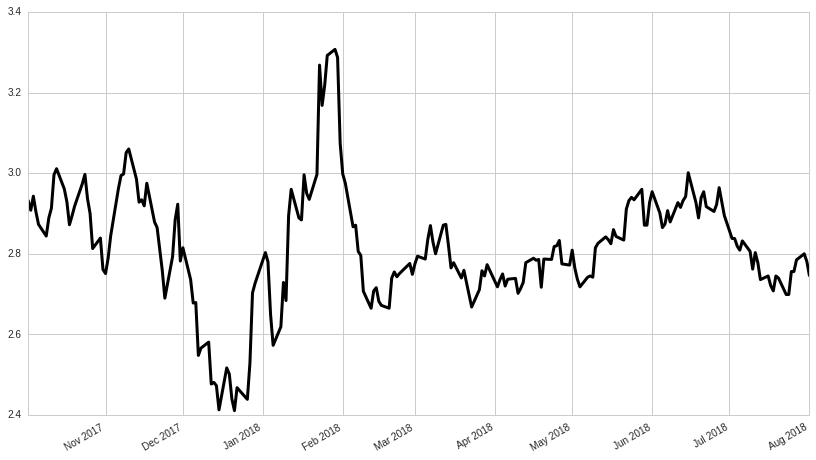

In [34]:
ng_cont_active['price'].plot(c='black',lw=3)

In [35]:
continuous_ng_unadjusted = continuous_future('NG',offset=0,roll='volume',adjustment=None)

In [36]:
ng_unadjusted_history = history(continuous_ng_unadjusted,
                                        fields=['contract','price'],
                                        frequency='daily',
                                        start='2017-10-01',
                                        end='2018-08-01')
ng_unadjusted_history.head()

,price,contract
2017-10-02 00:00:00+00:00,2.924,Future(1061201711 [NGX17])
2017-10-03 00:00:00+00:00,2.900,Future(1061201711 [NGX17])
2017-10-04 00:00:00+00:00,2.935,Future(1061201711 [NGX17])
2017-10-05 00:00:00+00:00,2.896,Future(1061201711 [NGX17])
2017-10-06 00:00:00+00:00,2.865,Future(1061201711 [NGX17])


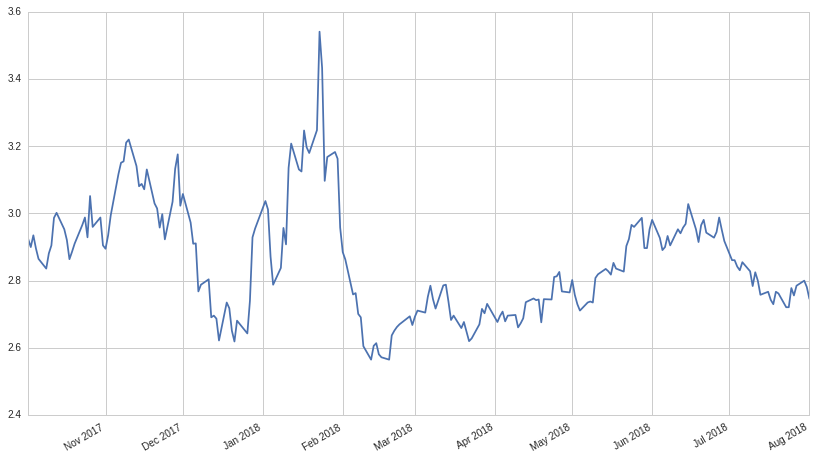

In [37]:
ng_unadjusted_history['price'].plot()

In [39]:
pivot_unadj = ng_unadjusted_history.pivot(index=ng_unadjusted_history.index,columns='contract')

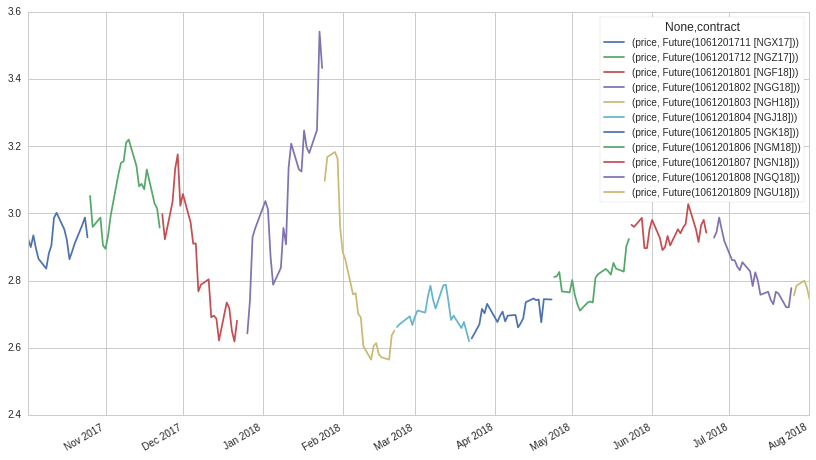

In [40]:
pivot_unadj.plot()

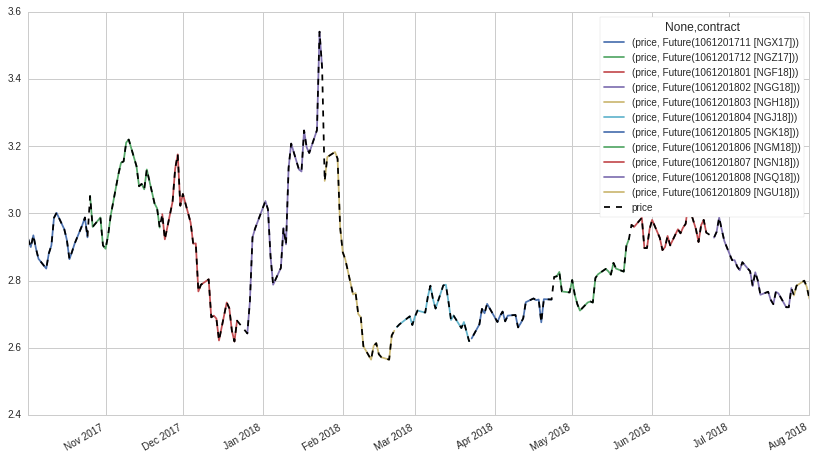

In [41]:
ax = pivot_unadj.plot()
ng_unadjusted_history.plot(ax=ax,ls='--',c='black')